# MNIST Handwritten Digit Recognition Using Deep Learning / Neural Networks
The MNIST dataset is one of the world's biggest datasets for Handwritten digits and in this project we have used the same and tried to build a neural network that recognises those digits.

In [483]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline

In [484]:
train_data = pd.DataFrame(pd.read_csv('train.csv'))

In [485]:
train_data.head()
label_data = train_data['label']
train_data = train_data.drop(['label'],axis=1)

In [486]:
train_data_copy = train_data
train_data.shape

(42000, 784)

In [487]:
[M,N] = train_data.shape
print("Rows : {}, Columns : {}".format(M,N))

Rows : 42000, Columns : 784


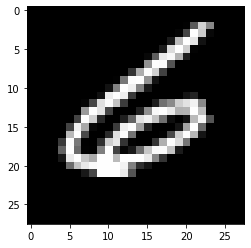

In [488]:
first_digit = train_data_copy.loc[21]
first_digit = np.array(first_digit)
first_digit = first_digit.reshape((28,28))
plt.imshow(first_digit, cmap='gray')

In [489]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.activations import linear,sigmoid

In [490]:
train_data = np.array(train_data)
print(type(train_data))

<class 'numpy.ndarray'>


In [491]:
train_data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [492]:
train_data = train_data.reshape(M,28,28)

In [493]:
print(train_data[1].shape)
print(train_data[1])

(28, 28)
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18  30 137 137 192  86  72   1
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0  13  86 250 254 254 254 254 217 246 151
   32   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  16 179 254 254 254 254 254 254 254 254 254
  231  54  15   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  72 254 254 254 254 254 254 254 254 254 254
  254 254 104   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0  61 191 254 254 254 254 254 1

In [494]:
train_data = train_data.reshape(M,N)

In [495]:
label_data = np.array(label_data)
new_label_data = np.zeros((M,10))
for i in range(M) :
    new_label_data[i][label_data[i]] = 1
new_label_data

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [496]:
digit_recog_model = Sequential(
    [
        Dense(784,activation='sigmoid'),
        Dense(25,activation='sigmoid'),
        Dense(20,activation='sigmoid'),
        Dense(10,activation='sigmoid')
    ]
)

In [497]:
digit_recog_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),loss=tf.keras.losses.BinaryCrossentropy())

In [498]:
digit_recog_model.fit(train_data,new_label_data,epochs=100)

Epoch 1/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.2722
Epoch 2/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.1126
Epoch 3/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0693
Epoch 4/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0567
Epoch 5/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0503
Epoch 6/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0453
Epoch 7/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0428
Epoch 8/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0414
Epoch 9/100
1313/1313 [==============================] - 10s 7ms/step - loss: 0.0392
Epoch 10/100
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0384
Epoch 11/100
1313/1313 [==============================] - 13s 10ms/step - loss: 0.0369
Epoch 12/100
1313/1313 [==============================] - 11s 8

1313/1313 [==============================] - 9s 7ms/step - loss: 0.0196
Epoch 97/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0201
Epoch 98/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0203
Epoch 99/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0213
Epoch 100/100
1313/1313 [==============================] - 9s 7ms/step - loss: 0.0205


In [499]:
predicts = digit_recog_model.predict(train_data)
predicts

1313/1313 [==============================] - 6s 4ms/step


array([[3.0614307e-09, 9.9938387e-01, 6.9018621e-05, ..., 1.3965485e-04,
        7.7545457e-04, 8.0230575e-07],
       [9.9756163e-01, 2.6751326e-08, 6.9769326e-04, ..., 1.1524387e-03,
        1.9131801e-05, 1.9106771e-04],
       [8.6348209e-09, 9.9849498e-01, 3.8468302e-04, ..., 6.0375802e-05,
        4.4663969e-04, 4.9703948e-07],
       ...,
       [2.0099538e-04, 3.8839258e-05, 3.0187990e-05, ..., 9.9733371e-01,
        2.8544559e-08, 3.6430191e-03],
       [5.6981386e-05, 2.0100572e-04, 4.8224680e-05, ..., 2.0028168e-05,
        1.1927668e-03, 2.2401757e-06],
       [3.8169190e-05, 2.9164626e-06, 1.3201124e-03, ..., 7.7153899e-02,
        3.5944752e-02, 8.1078446e-01]], dtype=float32)

In [500]:
result_convert = np.zeros(M)
for i in range(M):
    result_convert[i] = np.argmax(predicts[i],axis=0)
result_convert = result_convert.astype(int)

In [501]:
acc = 0
for i in range(M):
    if result_convert[i]==label_data[i]:
        acc+=1
print("Acuracy Of The Model On Train Data : {}".format((acc*100.00)/M))

Acuracy Of The Model On Train Data : 96.8452380952381


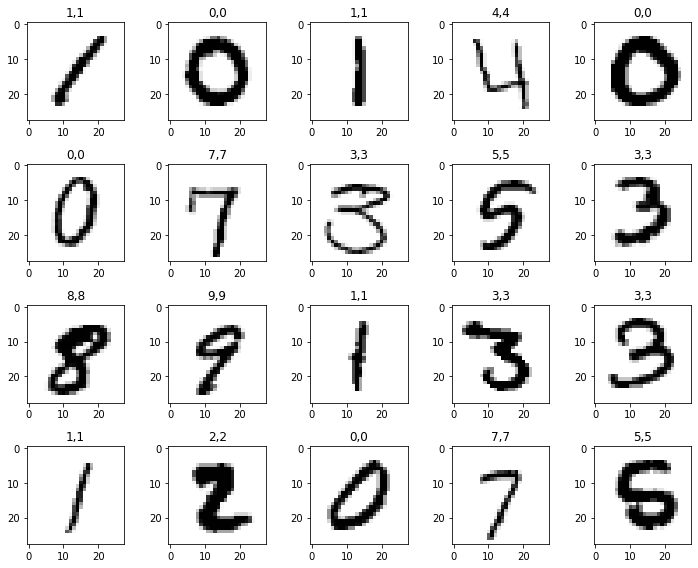

In [502]:
num_row = 4
num_col = 5
num = 20
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(train_data[i].reshape((28,28)), cmap='gray_r')
    ax.set_title('{},{}'.format(label_data[i],result_convert[i]))
plt.tight_layout()
plt.show()

In [503]:
# Testing On Test Data
test_data = pd.read_csv('test.csv')
test_data
test_data = pd.DataFrame(test_data)
test_data = np.array(test_data)
predicts = digit_recog_model.predict(test_data)

875/875 [==============================] - 4s 4ms/step


In [504]:
result_convert = np.zeros((test_data.shape[0],2))
for i in range(test_data.shape[0]):
    result_convert[i][1] = np.argmax(predicts[i],axis=0)
    result_convert[i][0] = i+1
result_convert = result_convert.astype(int)

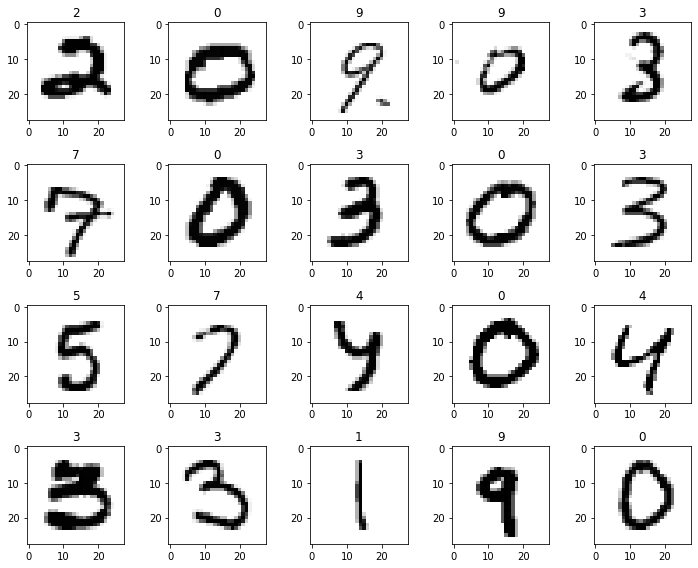

In [505]:
num_row = 4
num_col = 5
num = 20
fig, axes = plt.subplots(num_row, num_col, figsize=(2*num_col,2*num_row))
for i in range(num):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(test_data[i].reshape((28,28)), cmap='gray_r')
    ax.set_title('{}'.format(result_convert[i][1]))
plt.tight_layout()
plt.show()

In [506]:
import csv
header = ['ImageId','Label']
with open('predictions.csv','w',encoding='UTF8',newline='') as f :
    writer = csv.writer(f)
    writer.writerow(header)
    writer.writerows(result_convert)

# Thank You